**Please find the video here: https://youtu.be/menlB4UKasc**

# **Question 1**

---


tensor([0.0134, 0.5067, 0.7979,  ..., 0.4017, 0.8448, 0.1142])
tensor([0, 2, 2,  ..., 2, 2, 1], dtype=torch.int32)


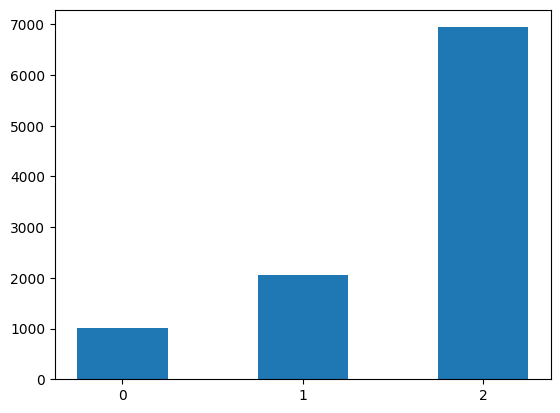

In [2]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def my_sampler(size, dist, requires_grad=False):
    """ """
    dist = torch.tensor(dist)
    assert (dist.sum() == 1)
    assert ((dist > 0).all())

    uniform_vars = torch.rand(size)
    dist_cumulative_sums = torch.cumsum(dist, dim=0)
    zero = torch.tensor(0)
    
    numbers = torch.zeros(size)

    num_elems = dist.numel()
    print(uniform_vars)
    for i in range(1, num_elems - 1):
      numbers += torch.where(
                    (dist_cumulative_sums[i-1] <= uniform_vars) *
                    (uniform_vars < dist_cumulative_sums[i]),
                    torch.tensor(i), zero)
        
    # check the last element 
    numbers += torch.where(uniform_vars >= dist_cumulative_sums[-2],
                               torch.tensor(num_elems - 1), zero)
    
    numbers.requires_grad = requires_grad
    return numbers.type(torch.IntTensor)
    
my_tensor = my_sampler(10000, [0.1, 0.2, 0.7])
print(my_tensor)
last_bar = max(my_tensor) # the last bar of the histogram is the largest number in the tensor
bins = np.arange(0, last_bar+1, 0.5) # make the bins so that the bars are in the middle of the numbers
my_tensor_to_list = my_tensor.tolist()
my_tensor_to_list.sort()
tensor_list_to_string = [str(number) for number in my_tensor_to_list]
matplotlib.pyplot.hist(tensor_list_to_string, bins=bins, align='left')
matplotlib.pyplot.show()

# Question 2

In [1]:
import torch


class MyScalar:
    def __init__(self, scalar, derivative=1, parent=None):
        self.scalar = scalar
        self.derivative = derivative
        self.parent = parent


def cos(a):
    return MyScalar(torch.cos(a.scalar), -torch.sin(a.scalar), a)


def sin(a):
    return MyScalar(torch.sin(a.scalar), torch.cos(a.scalar), a)


def ln(a):
    return MyScalar(torch.log(a.scalar), 1 / a.scalar, a)


def exp(a):
    return MyScalar(torch.exp(torch.tensor(a.scalar)), torch.exp(torch.tensor(a.scalar)), a)


def add(a, n):
    return MyScalar(a.scalar + n, 1, a)


def mul(a, n):
    return MyScalar(a.scalar * n, n, a)


def power(a, n):
    return MyScalar(a.scalar ** n, n * (a.scalar ** (n - 1)), a)


def get_gradient(a, chain_grad=1):
    if a.parent is None:
        grad_dic[a] = chain_grad
        return grad_dic
    else:
        grad_dic[a] = chain_grad
        return get_gradient(a.parent, a.derivative * chain_grad)


grad_dic = {}

a = MyScalar(2)
b = power(a, 2)
c = exp(b)
d = get_gradient(c)
print(d[c], d[b], d[a], sep=', ')

a = torch.tensor([2.], requires_grad=True)
b = torch.pow(a, 2)
c = torch.exp(b)
c.backward()
print(a.grad)


1, tensor(54.5981), tensor(218.3926)
tensor([218.3926])
